<a href="https://colab.research.google.com/github/yusufsugiono/reddit-sentiment-analysis/blob/main/Dicoding_ML_Advanced_Reddit_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiclass Text Classification - Reddit Sentiment Analysis

Dataset : https://www.kaggle.com/cosmos98/twitter-and-reddit-sentimental-analysis-dataset
</br></br>
Oleh:  
[Yusuf Sugiono](https://www.dicoding.com/users/yusufsugiono) (ysf.sugiono@gmail.com)  
Kabupaten Nganjuk, Jawa Timur  
Universitas Trunojoyo Madura

16 September 2021

## Import Dataset
Untuk memudahkan proses import dataset, untuk saat ini saya telah mengunggah dataset yang sudah diekstrak (berupa csv) di Google Drive

In [ ]:
!wget --no-check-certificate "https://drive.google.com/u/0/uc?id=1kZWS9GFNXtuOXRnqR0mgQoAN3f18dXcm&export=download" -O Reddit_Data.csv

--2022-02-03 08:20:32--  https://drive.google.com/u/0/uc?id=1kZWS9GFNXtuOXRnqR0mgQoAN3f18dXcm&export=download
Resolving drive.google.com (drive.google.com)... 74.125.133.100, 74.125.133.102, 74.125.133.101, ...
Connecting to drive.google.com (drive.google.com)|74.125.133.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-9c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/9ipl1eocdbg8ae21plb4e9bobjsemnee/1643876400000/18090373580114263716/*/1kZWS9GFNXtuOXRnqR0mgQoAN3f18dXcm?e=download [following]
--2022-02-03 08:20:34--  https://doc-0k-9c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/9ipl1eocdbg8ae21plb4e9bobjsemnee/1643876400000/18090373580114263716/*/1kZWS9GFNXtuOXRnqR0mgQoAN3f18dXcm?e=download
Resolving doc-0k-9c-docs.googleusercontent.com (doc-0k-9c-docs.googleusercontent.com)... 142.250.110.132, 2a00:1450:400c:c0d::84
Connecting to doc-0k-9c-docs.googleusercontent.com (d

In [ ]:
import pandas as pd
df = pd.read_csv('Reddit_Data.csv')
df

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
...,...,...
37244,jesus,0
37245,kya bhai pure saal chutiya banaya modi aur jab...,1
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


## Preprocessing

### Penanganan Missing Value
Dari eksekusi `df.info()` di atas, dapat diketahui bahwa ada missing value (NaN / Null). Karena jumlahnya tidak terlalu banyak maka dapat kita hapus dengan `df.dropna()`

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37149 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37149 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 870.7+ KB


Setelah kita hapus, dapat kita lihat bahwa sekarang tidak ada lagi missing value pada dataframe (ditunjukkan dengan jumlah Non-null count yang sama di semua kolom)

### One-Hot Encoding

Kemudian kita akan melakukan One-Hot Encoding menggunakan `get_dummies()`serta membuatnya ke dalam dataframe baru. Selain itu juga mengubah nama kolomnya agar lebih terlihat rapi dan mudah dibaca.

In [ ]:
sentiment = pd.get_dummies(df['category'])
clean_df = pd.concat([df, sentiment], axis=1)
clean_df = clean_df.drop(columns=["category"])
clean_df = clean_df.rename(columns={-1:'negative', 0:'neutral', 1:'positive'})
clean_df

,clean_comment,negative,neutral,positive
0,family mormon have never tried explain them t...,0,0,1
1,buddhism has very much lot compatible with chr...,0,0,1
2,seriously don say thing first all they won get...,1,0,0
3,what you have learned yours and only yours wha...,0,1,0
4,for your own benefit you may want read living ...,0,0,1
...,...,...,...,...
37244,jesus,0,1,0
37245,kya bhai pure saal chutiya banaya modi aur jab...,0,0,1
37246,downvote karna tha par upvote hogaya,0,1,0
37247,haha nice,0,0,1


### Membersihkan *Stopwords*

In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_word = set(stopwords.words('english'))

clean_df['clean_comment'] = clean_df['clean_comment'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop_word)]))

clean_df

,clean_comment,negative,neutral,positive
0,family mormon never tried explain still stare ...,0,0,1
1,buddhism much lot compatible christianity espe...,0,0,1
2,seriously say thing first get complex explain ...,1,0,0
3,learned want teach different focus goal wrappi...,0,1,0
4,benefit may want read living buddha living chr...,0,0,1
...,...,...,...,...
37244,jesus,0,1,0
37245,kya bhai pure saal chutiya banaya modi aur jab...,0,0,1
37246,downvote karna tha par upvote hogaya,0,1,0
37247,haha nice,0,0,1


### Menyiapkan Data Latih dan Data Uji
Untuk pembuatan model kali ini, kita akan membuat perbandingan data latih dan data uji sebesar 8:2.

In [ ]:
from sklearn.model_selection import train_test_split

comment = clean_df['clean_comment'].values
label = clean_df[['negative', 'neutral', 'positive']].values

comment_train, comment_test, label_train, label_test = train_test_split(comment, label, test_size=0.2)

### Tokenizing

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=49005, oov_token='x')
tokenizer.fit_on_texts(comment_train)

In [ ]:
word_index = tokenizer.word_index
print(len(word_index))

47696


In [ ]:
import json

# Save word_index to a json file
with open('word_index.json', 'w') as fp:
    json.dump(word_index, fp)

In [ ]:
sequences_train = tokenizer.texts_to_sequences(comment_train)
sequences_test = tokenizer.texts_to_sequences(comment_test)

In [ ]:
# Get max training sequence length
maxlen = max([len(x) for x in sequences_train])

print(maxlen)

867


In [ ]:
pad_train = pad_sequences(sequences_train, maxlen=maxlen)
pad_test = pad_sequences(sequences_test, maxlen=maxlen)

## Membangun Model

### Penyusunan Layer

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.backend import clear_session

# Clear Tensorflow Session
clear_session()

model = Sequential([
    Embedding(input_dim=49005, input_length=maxlen, output_dim=16),
    Bidirectional(LSTM(64)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])
 
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

## Melatih Model

In [ ]:
history = model.fit(
    pad_train,
    label_train,
    epochs=5,
    validation_data=(pad_test, label_test)
)

Epoch 1/5
929/929 [==============================] - 216s 225ms/step - loss: 0.7210 - accuracy: 0.6778 - val_loss: 0.5459 - val_accuracy: 0.7716
Epoch 2/5
929/929 [==============================] - 231s 248ms/step - loss: 0.4408 - accuracy: 0.8312 - val_loss: 0.5019 - val_accuracy: 0.8205
Epoch 3/5
929/929 [==============================] - 229s 246ms/step - loss: 0.3240 - accuracy: 0.8822 - val_loss: 0.4814 - val_accuracy: 0.8359
Epoch 4/5
929/929 [==============================] - 227s 244ms/step - loss: 0.1984 - accuracy: 0.9354 - val_loss: 0.4805 - val_accuracy: 0.8427
Epoch 5/5
929/929 [==============================] - 223s 240ms/step - loss: 0.1306 - accuracy: 0.9622 - val_loss: 0.5857 - val_accuracy: 0.8369


## Visualisasi Plot Akurasi dan Loss Model  

### Plot Akurasi Model

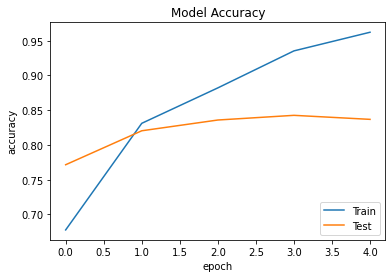

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

### Plot Loss Model

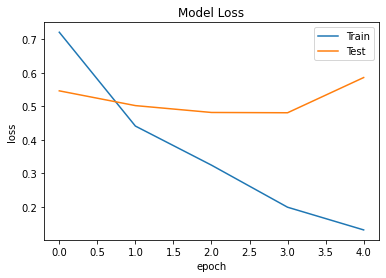

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

## Menjalankan Prediksi

Setelah melatih model, kita dapat menguji coba untuk memprediksi sentimen dari kalimat baru yang kita inputkan. Namun dalam hal ini kita tidak dapat menggunakan Bahasa Indonesia karena bahasa yang digunakan dalam dataset di atas adalah Bahasa Inggris dan India.

In [ ]:
def run_predictions(model, tokenizer, ml, test_sentences):
  classes = ['Negatif', 'Netral', 'Positif']
  for sentence in test_sentences:
    text = [sentence]
    t = tokenizer.texts_to_sequences(text)
    t = pad_sequences(t, maxlen=ml)
    pred_t = model.predict(t)
    print(classes[pred_t.argmax()], "  \t|", sentence)

In [ ]:
test_sentences = ['I am so excited about the concert',
                  'I feel tired this morning',
                  'Childhood is the time to play',
                  'I\'m happy to learn at Dicoding']
                  
run_predictions(model, tokenizer, maxlen, test_sentences)

Positif   	| I am so excited about the concert
Negatif   	| I feel tired this morning
Netral   	| Childhood is the time to play
Positif   	| I'm happy to learn at Dicoding


## Menyimpan Model

Agar suatu saat dapat digunakan kembali, kita dapat menyimpan model yang telah kita dapatkan.


In [ ]:
model.save('sentiment_model.h5')

In [ ]:
# Install tensorflowjs
!pip install tensorflowjs

     |████████████████████████████████| 77 kB 3.1 MB/s 


In [ ]:
# Convert sentiment_model.h5 ke tfjs_model
!tensorflowjs_converter --input_format=keras sentiment_model.h5 tfjs_model